# **Problem Statement**  
## **32. Perform dimensionality reduction using t-SNE and visualize clusters.**

Perform dimensionality reduction using t-SNE (t-Distributed Stochastic Neighbor Embedding) and visualize clusters in a high-dimensional dataset.

The goal is to:
- Reduce high-dimensional data to 2D
- Preserve local neighborhood structure
- Visually inspect clustering patterns

### Constraints & Example Inputs/Outputs

### Constraints
- t-SNE is computationally expensive
- Works best for visualization (not downstream modeling)
- Sensitive to hyperparameters (perplexity, learning rate)
- Input features should be scaled

### Example Input:
```python
Dataset shape: (1000, 50)
Number of clusters: 3

```

Expected Output:
```python
2D scatter plot showing clearly separated clusters

```

### Solution Approach

**Step 1: Understand the Problem**
- High-dimensional data is hard to visualize
- We want a 2D representation that preserves similarity

**Step 2: Baseline (Brute Force) Approach**
- Use PCA → 2D
- Fast but preserves global variance, not local structure

**Step 3: Optimized Approach (t-SNE)**
- Converts distances into probability distributions
- Preserves local neighborhoods
- Ideal for cluster visualization

**Step 4: Visualization**
- Plot reduced dimensions using scatter plot
- Color points by class labels

### Solution Code

In [1]:
# Approach 1: Brute Force Approach: PCA for Visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def pca_visualization(X, n_components=2):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    return X_pca


### Alternative Solution

In [2]:
# Approach 2: Optimized Approach: t-SNE
from sklearn.manifold import TSNE

def tsne_visualization(X, n_components=2, perplexity=30, random_state=42):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    tsne = TSNE(
        n_components=n_components,
        perplexity=perplexity,
        learning_rate='auto',
        random_state=random_state
    )
    
    X_tsne = tsne.fit_transform(X_scaled)
    return X_tsne


### Alternative Approaches

**Brute Force**
- PCA
- Random Projection

**Optimized**
- t-SNE ✅
- UMAP (faster & scalable)
- Autoencoders

### Test Case

In [4]:
# Test Case 1: Generate Synthetic Clustered Data
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=500,
    n_features=10,
    centers=3,
    cluster_std=1.0,
    random_state=42
)

X.shape, y.shape


((500, 10), (500,))

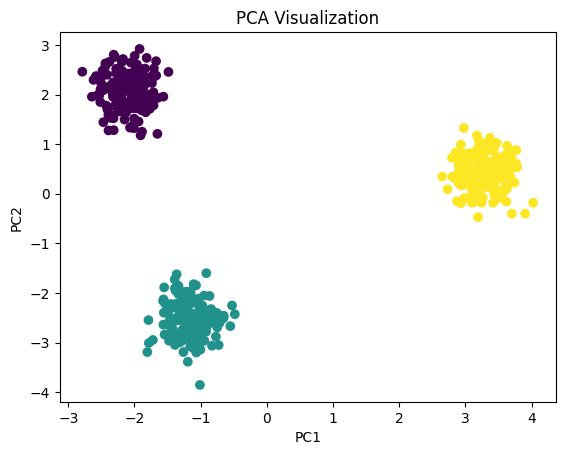

In [5]:
# Test Case 2: PCA Visualization
X_pca = pca_visualization(X)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("PCA Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


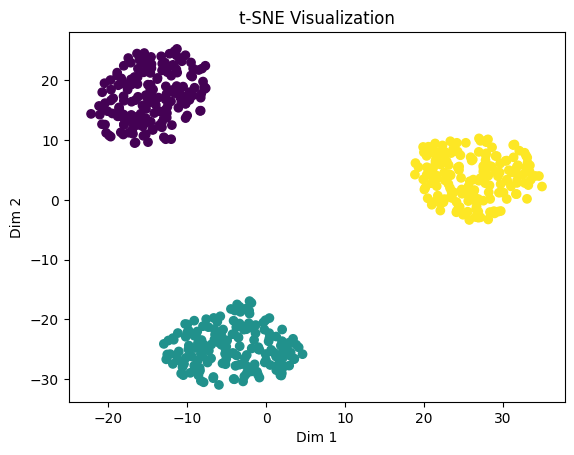

In [6]:
# Test Case 3: t-SNE Visualization
X_tsne = tsne_visualization(X, perplexity=30)

plt.figure()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.title("t-SNE Visualization")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()


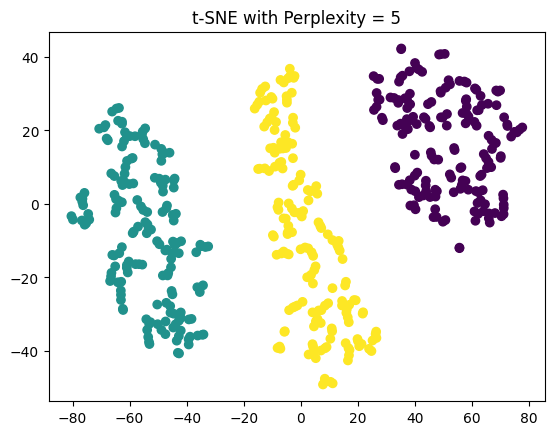

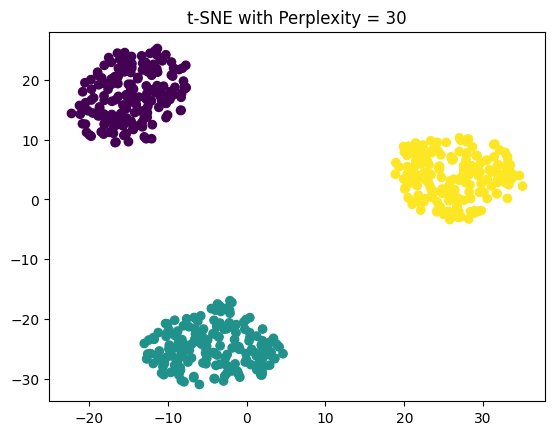

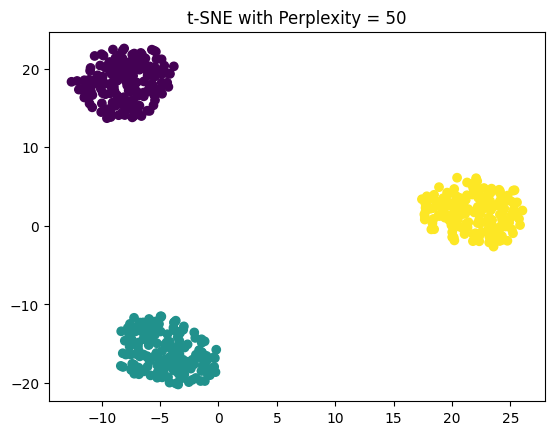

In [7]:
# Test Case 4: Effect of Perplexity
for p in [5, 30, 50]:
    X_tsne = tsne_visualization(X, perplexity=p)
    
    plt.figure()
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
    plt.title(f"t-SNE with Perplexity = {p}")
    plt.show()


## Complexity Analysis

### PCA
- Time: O(n × d²)
- Space: O(n × d)

### t-SNE
- Time: O(n²) (exact)
- Space: O(n²)

#### Thank You!!